In [1]:
#problem statement
#Build a simple linear regression model by performing EDA and do necessary transformation and select the best model using python
#Delivery_time -> predict delivery time using sorting time

import pandas as pd

In [2]:
data = pd.read_csv("c:/Users/dell/Downloads/delivery_time.csv")

In [3]:
data.head()

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Delivery Time  21 non-null     float64
 1   Sorting Time   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


In [5]:
data.corr()

,Delivery Time,Sorting Time
Delivery Time,1.000000,0.825997
Sorting Time,0.825997,1.000000


C:\Users\dell\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Delivery Time', ylabel='Density'>

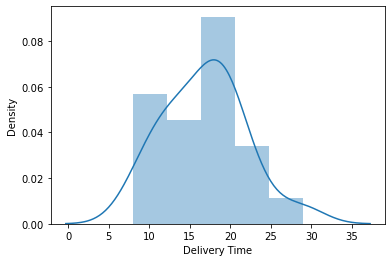

In [6]:
import seaborn as sns
sns.distplot(data['Delivery Time'])

C:\Users\dell\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Sorting Time', ylabel='Density'>

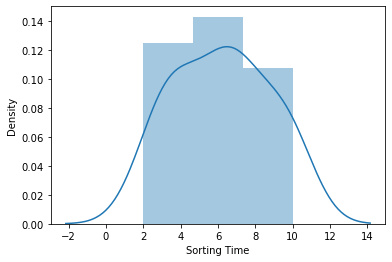

In [7]:
sns.distplot(data['Sorting Time'])

In [8]:
#Renaming Columns
data=data.rename({'Delivery Time':'delivery_time', 'Sorting Time':'sorting_time'},axis=1)
data

,delivery_time,sorting_time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


In [9]:
data.corr()

,delivery_time,sorting_time
delivery_time,1.000000,0.825997
sorting_time,0.825997,1.000000


In [10]:
import statsmodels.formula.api as smf
model = smf.ols("delivery_time~sorting_time",data = data).fit()

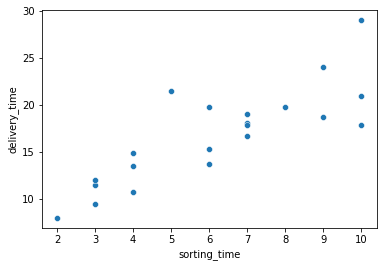

In [11]:
sns.scatterplot(x="sorting_time", y="delivery_time", data=data);

In [12]:
model.params

Intercept       6.582734
sorting_time    1.649020
dtype: float64

In [13]:
print(model.tvalues, '\n', model.pvalues)    

Intercept       3.823349
sorting_time    6.387447
dtype: float64 
 Intercept       0.001147
sorting_time    0.000004
dtype: float64


In [14]:
(model.rsquared,model.rsquared_adj)

(0.6822714748417231, 0.6655489208860244)

# By using log transformation

In [15]:
import numpy as np
data1 = np.log(data)
#y = np.log()


In [16]:
data1

,delivery_time,sorting_time
0,3.044522,2.302585
1,2.602690,1.386294
2,2.983153,1.791759
3,3.178054,2.197225
4,3.367296,2.302585
5,2.731115,1.791759
6,2.944439,1.945910
7,2.251292,1.098612
8,2.884801,2.302585
9,2.931194,2.197225


In [17]:
data1.rename(columns={'delivery_time':'delivery', 'sorting_time':'sorting'},inplace = True)

In [18]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   delivery  21 non-null     float64
 1   sorting   21 non-null     float64
dtypes: float64(2)
memory usage: 464.0 bytes


In [19]:
data1.corr()

,delivery,sorting
delivery,1.000000,0.878727
sorting,0.878727,1.000000


In [20]:
data1.corr()

,delivery,sorting
delivery,1.000000,0.878727
sorting,0.878727,1.000000


In [21]:
import statsmodels.formula.api as smf
model = smf.ols("delivery~sorting",data = data1).fit()

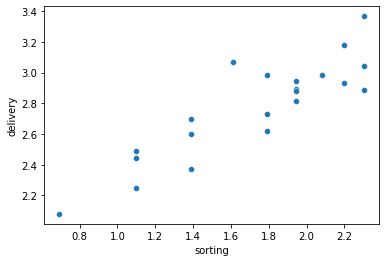

In [22]:
sns.scatterplot(x="sorting", y="delivery", data=data1);

In [23]:
model.params

Intercept    1.741987
sorting      0.597522
dtype: float64

In [24]:
print(model.tvalues, '\n', model.pvalues)

Intercept    13.085552
sorting       8.024484
dtype: float64 
 Intercept    5.921137e-11
sorting      1.601539e-07
dtype: float64


In [25]:
(model.rsquared,model.rsquared_adj)

(0.77216134926874, 0.7601698413355158)

#INFERENCE
#By using raw data 
rsquared value and rsquared_adj value = (0.6822714748417231, 0.6655489208860244)
By using

#Log Transformation 
"it is used for treating outliers"
By using log transformation 
rsquared value and rsquared_adj value = (0.77216134926874, 0.7601698413355158)

#The transformed "rsquared value" is greater than the raw-score rsquared,
SO the transformation is sucessful   
